In [1]:
import numpy as np
from tqdm.auto import tqdm
from anndata import read_h5ad, AnnData
import scanpy as sc

In [2]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 72 # 150 dpi resolution
matplotlib.rcParams['image.cmap'] = 'Spectral_r' # preferred color map
matplotlib.rcParams['figure.figsize'] = [6, 6] # Square
# no bounding boxes or axis:
matplotlib.rcParams['axes.spines.bottom'] = "off"
matplotlib.rcParams['axes.spines.top'] = "off"
matplotlib.rcParams['axes.spines.left'] = "off"
matplotlib.rcParams['axes.spines.right'] = "off"

In [3]:
fraction_inceremnts = .9
min_cells = 100
max_subsamples = 1000
seed = 672382
rna_annData_file = (f'/fh/fast/setty_m/user/msetty/projects/sc-density/data/waddington-ot-ips/ipsc_reprog.h5ad')
out_dir = 'data/subsamples/hierarchical/ips/'

In [4]:
rna_ad = read_h5ad(rna_annData_file)

In [5]:
rna_ad.obsm['X_FDL_paper'] = rna_ad.obsm['X_FDL_paper'].values

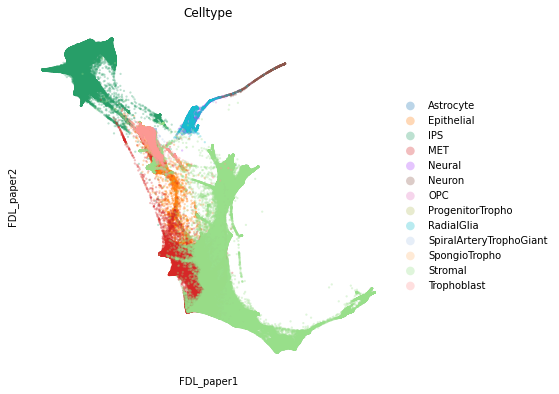

In [6]:
sc.pl.scatter(rna_ad, basis='FDL_paper', color='Celltype', size=20, alpha=.3)

In [7]:
np.random.seed(seed)
sub_ad = rna_ad.copy()
n_digits = int(np.log10(max_subsamples) + 1)
m = 0
out_path = out_dir + f'sub_{m:0{n_digits}}.h5ad'
sub_ad.write(out_path)
n = sub_ad.n_obs
for m in tqdm(range(1, max_subsamples)):
    n = int(n * fraction_inceremnts)
    if n < min_cells:
        break
    idx = np.random.choice(sub_ad.n_obs, n, replace=False)
    sub_ad = sub_ad[idx, :]
    out_path = out_dir + f'sub_{m:0{n_digits}}.h5ad'
    sub_ad.write(out_path)
else:
    print(f'Stopped at {n:,} cells after {max_subsamples:,} iterations.')
print(f'Produced {m:,} subsamples.')

  0%|          | 0/999 [00:00<?, ?it/s]

Produced 74 subsamples.
